In [1]:
from tokenize import PlainToken

import numpy as np
import pandas as pd

import warnings

from numpy.ma.extras import column_stack
from sympy.physics.units import frequency
from timm.data.auto_augment import color

warnings.filterwarnings('ignore')

C:\Users\sammi\anaconda3\envs\tensorflow-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#Handling Missing Values

Missing values are data points that are absent for a specific variable in a dataset. They can be represented in various ways, such as blank cells, null values, or special symbols like “NA” or “unknown.” These missing data points pose a significant challenge in data analysis and can lead to inaccurate or biased results.

In [2]:
# Creating a sample DataFrame with missing values
data = {
    'School ID': [101, 102, 103, np.nan, 105, 106, 107, 108],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'],
    'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln', '101 Elm St', np.nan, '222 Maple Rd', '444 Cedar Blvd', '555 Birch Dr'],
    'City': ['Los Angeles', 'New York', 'Houston', 'Los Angeles', 'Miami', np.nan, 'Houston', 'New York'],
    'Subject': ['Math', 'English', 'Science', 'Math', 'History', 'Math', 'Science', 'English'],
    'Marks': [85, 92, 78, 89, np.nan, 95, 80, 88],
    'Rank': [2, 1, 4, 3, 8, 1, 5, 3],
    'Grade': ['B', 'A', 'C', 'B', 'D', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
print("Sample DataFrame:")

print(df)

Sample DataFrame:
   School ID     Name         Address         City  Subject  Marks  Rank Grade
0      101.0    Alice     123 Main St  Los Angeles     Math   85.0     2     B
1      102.0      Bob     456 Oak Ave     New York  English   92.0     1     A
2      103.0  Charlie     789 Pine Ln      Houston  Science   78.0     4     C
3        NaN    David      101 Elm St  Los Angeles     Math   89.0     3     B
4      105.0      Eva             NaN        Miami  History    NaN     8     D
5      106.0    Frank    222 Maple Rd          NaN     Math   95.0     1     A
6      107.0    Grace  444 Cedar Blvd      Houston  Science   80.0     5     C
7      108.0    Henry    555 Birch Dr     New York  English   88.0     3     B


##Removing Rows with Missing Values
* Simple and efficient: Removes data points with missing values altogether.
* Reduces sample size: Can lead to biased results if missingness is not random.
* Not recommended for large datasets: Can discard valuable information.

In this example, we are removing rows with missing values from the original DataFrame (`df`) using the `dropna()` method and then displaying the cleaned DataFrame (`df_cleaned`).

In [3]:
# Removing rows with missing values
df_cleaned = df.dropna()

# Displaying the DataFrame after removing missing values
print("\nDataFrame after removing rows with missing values:")
print(df_cleaned)


DataFrame after removing rows with missing values:
   School ID     Name         Address         City  Subject  Marks  Rank Grade
0      101.0    Alice     123 Main St  Los Angeles     Math   85.0     2     B
1      102.0      Bob     456 Oak Ave     New York  English   92.0     1     A
2      103.0  Charlie     789 Pine Ln      Houston  Science   78.0     4     C
6      107.0    Grace  444 Cedar Blvd      Houston  Science   80.0     5     C
7      108.0    Henry    555 Birch Dr     New York  English   88.0     3     B


## Imputation Methods
* Replacing missing values with estimated values.
* Preserves sample size: Doesn’t reduce data points.
* Can introduce bias: Estimated values might not be accurate.

###Mean, Median, and Mode Imputation:

* Replace missing values with the mean, median, or mode of the relevant variable.
* Simple and efficient: Easy to implement.
* Can be inaccurate: Doesn't consider the relationships between variables.

In this example, we are explaining the imputation techniques for handling missing values in the `Marks` column of the DataFrame (`df`). It calculates and fills missing values with the mean, median, and mode of the existing values in that column, and then prints the results for observation.

1. Mean Imputation: Calculates the mean of the Marks column in the DataFrame (`df`).
* `df['Marks'].fillna(df['Marks'].mean())`: Fills missing values in the Marks column with the mean value.
* `mean_imputation`: The result is stored in the variable mean_imputation.
2. Median Imputation: Calculates the median of the Marks column in the DataFrame (`df`).
* `df['Marks'].fillna(df['Marks'].median())`: Fills missing values in the Marks column with the median value.
* `median_imputation`: The result is stored in the variable median_imputation.
3. Mode Imputation: Calculates the mode of the Marks column in the DataFrame (`df`). The result is a Series.
* `.iloc[0]`: Accesses the first element of the Series, which represents the mode.
* `df['Marks'].fillna(df['Marks'].mode())`: Fills missing values in the Marks column with the mode value.

In [4]:
#  Mean, Median, and Mode Imputation
mean_imputation = df['Marks'].fillna(df['Marks'].mean())
median_imputation = df['Marks'].fillna(df['Marks'].median())
mode_imputation = df['Marks'].fillna(df['Marks'].mode().iloc[0])

print("\nImputation using Mean:")
print(mean_imputation)

print("\nImputation using Median:")
print(median_imputation)

print("\nImputation using Mode:")
print(mode_imputation)


Imputation using Mean:
0    85.000000
1    92.000000
2    78.000000
3    89.000000
4    86.714286
5    95.000000
6    80.000000
7    88.000000
Name: Marks, dtype: float64

Imputation using Median:
0    85.0
1    92.0
2    78.0
3    89.0
4    88.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

Imputation using Mode:
0    85.0
1    92.0
2    78.0
3    89.0
4    78.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64


###Forward and Backward Fill

* Replace missing values with the previous or next non-missing value in the same variable.
* Simple and intuitive: Preserves temporal order.
* Can be inaccurate: Assumes missing values are close to observed values

These fill methods are particularly useful when there is a logical sequence or order in the data, and missing values can be reasonably assumed to follow a pattern. The method parameter in `fillna()` allows to specify the filling strategy, and here, it’s set to `ffill` for forward fill and `bfill` for backward fill.

1. Forward Fill (`forward_fill`)
* `df['Marks'].fillna(method='ffill')`: This method fills missing values in the `Marks` column of the DataFrame (`df`) using a forward fill strategy. It replaces missing values with the last observed non-missing value in the column.
* `forward_fill`: The result is stored in the variable `forward_fill`.
2. Backward Fill (`backward_fill`)
* `df['Marks'].fillna(method='bfill')`: This method fills missing values in the `Marks` column using a backward fill strategy. It replaces missing values with the next observed non-missing value in the column.
* `backward_fill`: The result is stored in the variable `backward_fill`.

In [5]:
# Forward and Backward Fill
forward_fill = df['Marks'].fillna(method='ffill')
backward_fill = df['Marks'].fillna(method='bfill')

print("\nForward Fill:")
print(forward_fill)

print("\nBackward Fill:")
print(backward_fill)


Forward Fill:
0    85.0
1    92.0
2    78.0
3    89.0
4    89.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

Backward Fill:
0    85.0
1    92.0
2    78.0
3    89.0
4    95.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64


###Interpolation Techniques

* Estimate missing values based on surrounding data points.
* More sophisticated than mean/median imputation: Captures relationships between variables.

These interpolation techniques are useful when the relationship between data points can be reasonably assumed to follow a linear or quadratic pattern. The method parameter in the `interpolate()` method allows to specify the interpolation strategy.

1. Linear Interpolation
* `df['Marks'].interpolate(method='linear')`: This method performs linear interpolation on the `Marks` column of the DataFrame (`df`). Linear interpolation estimates missing values by considering a straight line between two adjacent non-missing values.
* `linear_interpolation`: The result is stored in the variable linear_interpolation.
2. Quadratic Interpolation
* `df['Marks'].interpolate(method='quadratic')`: This method performs quadratic interpolation on the `Marks` column. Quadratic interpolation estimates missing values by considering a quadratic curve that passes through three adjacent non-missing values.
* `quadratic_interpolation`: The result is stored in the variable quadratic_interpolation.

In [6]:
#  Interpolation Techniques
linear_interpolation = df['Marks'].interpolate(method='linear')
quadratic_interpolation = df['Marks'].interpolate(method='quadratic')

print("\nLinear Interpolation:")
print(linear_interpolation)

print("\nQuadratic Interpolation:")
print(quadratic_interpolation)


Linear Interpolation:
0    85.0
1    92.0
2    78.0
3    89.0
4    92.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

Quadratic Interpolation:
0    85.00000
1    92.00000
2    78.00000
3    89.00000
4    98.28024
5    95.00000
6    80.00000
7    88.00000
Name: Marks, dtype: float64


#Detecting and Removing Outliers

An outlier is a data item/object that deviates significantly from the rest of the objects in a dataset. Outliers can distort statistical analyses, affecting mean, variance, and other measures. Removal improves model performance and data accuracy. Common techniques include visualization tools (box plots, scatter plots), mathematical methods (Z-scores, IQR), and threshold-based filtering.

In [7]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_names = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_names
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


##Visualizing and Removing Outliers Using a Box Plot

Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights (quartiles, median, and outliers) into the dataset by just looking at its boxplot.

<Axes: ylabel='bmi'>

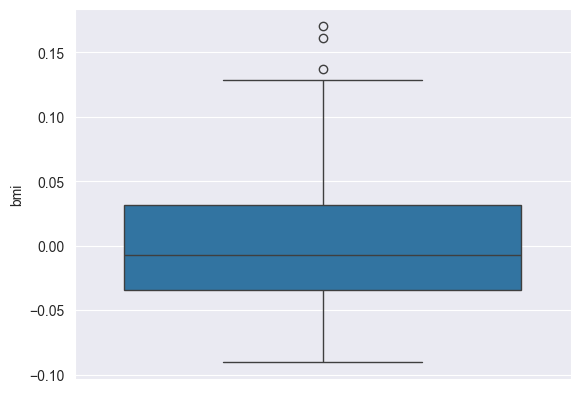

In [8]:
import seaborn as sns

sns.boxplot(df_diabetics['bmi'])

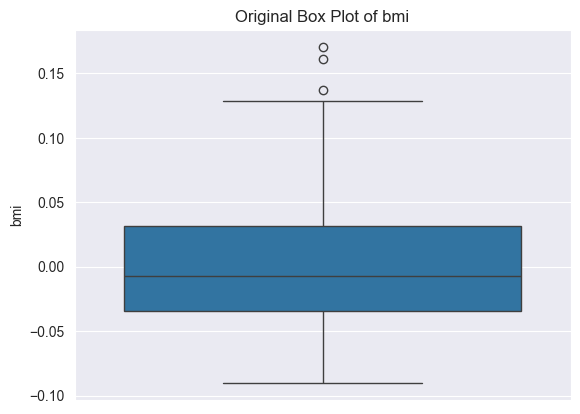

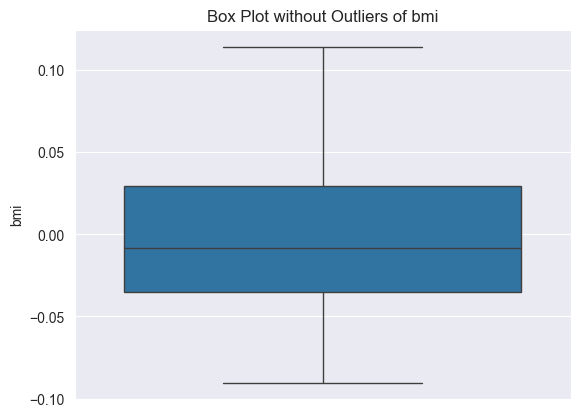

In [9]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

##Visualizing and Removing Outliers Using a Scatterplot

A scatterplot is useful for detecting and removing outliers when analyzing the relationship between two numerical variables. It helps visualize data distribution, making extreme values that deviate significantly from the overall pattern easily identifiable. Outliers often appear as isolated points far from the main cluster, indicating possible data entry errors, measurement anomalies, or genuine rare occurrences.

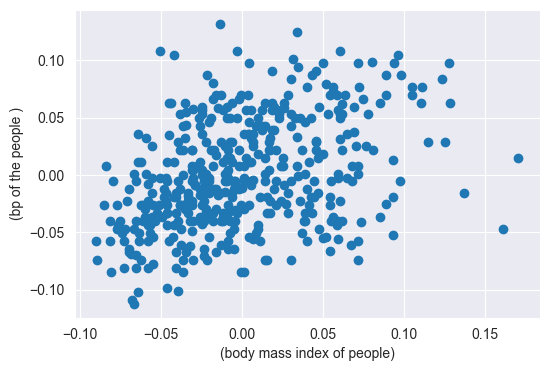

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()


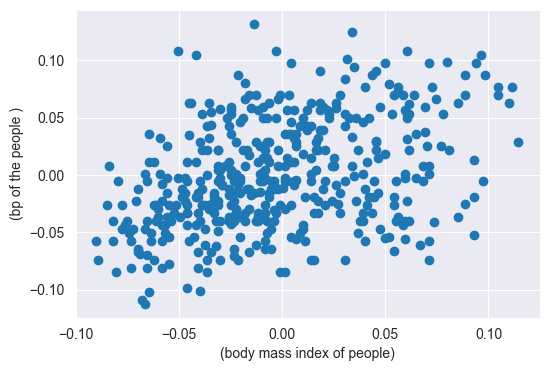

In [11]:
outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0]) # extract the array from tuple

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()


##Z-score

Z-score, also known as the standard score, tells us the deviation of a data point from the mean by expressing it in terms of standard deviations above or below the mean. It gives us an idea of how far a data point is from the mean. Hence, the Z-score is measured in terms of standard deviation from the mean. For example, a Z-score of 2 indicates the value is 2 standard deviations away from the mean.

In [12]:
from scipy import stats

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

[0.80050009 0.03956713 1.79330681 1.87244107 0.11317236 1.94881082
 0.9560041  1.33508832 0.87686984 1.49059233 2.02518057 0.57139085
 0.34228161 0.11317236 0.95323959 1.1087436  0.11593688 1.48782782
 0.80326461 0.57415536 1.03237385 1.79607132 1.79607132 0.95323959
 1.33785284 1.41422259 2.25428981 0.49778562 1.10597908 1.41145807
 1.26148309 0.49778562 0.72413034 0.6477606  0.34228161 1.02960933
 0.26591186 0.19230663 0.03956713 0.03956713 0.11317236 2.10155031
 1.26148309 0.41865135 0.95323959 0.57139085 1.18511334 1.64333183
 1.41145807 0.87963435 0.72413034 1.25871858 1.1087436  0.19230663
 1.03237385 0.87963435 0.87963435 0.57415536 0.87686984 1.33508832
 1.49059233 0.87963435 0.57415536 0.72689486 1.41145807 0.9560041
 0.19230663 0.87686984 0.80050009 0.34228161 0.03956713 0.03956713
 1.33508832 0.26591186 0.26591186 0.19230663 0.65052511 2.02518057
 0.11317236 2.17792006 1.48782782 0.26591186 0.34504612 0.80326461
 0.03680262 0.95323959 1.49059233 0.95323959 1.1087436  0.95600

In [13]:
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


##Interquartile Range (IQR)

The interquartile range (IQR) is a simple way to measure how spread out the middle 50% of a dataset is. It's used in statistics to understand the spread of data by focusing on the central part, ignoring any extreme values or outliers. This makes the IQR a useful tool when you want to get a clear sense of where most of your data points lie, without letting unusually high or low values distort the picture.

To define an outlier, base value is defined above and below dataset's normal range, namely upper and lower bounds:

* `upper = Q3 + 1.5 * IQR`
* `lower = Q1 - 1.5 * IQR`

In [14]:
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetics['bmi'].quantile(0.25)
Q3 = df_diabetics['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetics['bmi'] >= upper)[0]
lower_array = np.where(df_diabetics['bmi'] <= lower)[0]

# Removing the outliers
df_diabetics.drop(index=upper_array, inplace=True)
df_diabetics.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetics.shape)

New Shape:  (439, 10)


#Feature Engineering



##Scaling

Min-max scaling rescales values to a fixed range, typically [0,1], using the formula:

$$X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$$

Use Min-Max Scaling When:
* Feature values have a known range (e.g., pixel intensities [0,255], percentages [0,100]).
* Data is not normally distributed
* You are using distance-based models (e.g., k-NN, SVM, Neural Networks) where maintaining relative distances is important.
* Avoid it if outliers exist, as extreme values will dominate the scaling.
* Examples: Image processing, financial ratios, and sensor data.




In [15]:
df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20250114174407596134/SampleFile.csv')
df.head()

,LotArea,MSSubClass
0,8450,60
1,9600,20
2,11250,60
3,9550,70
4,14260,60


In [16]:
df.shape

(1460, 2)

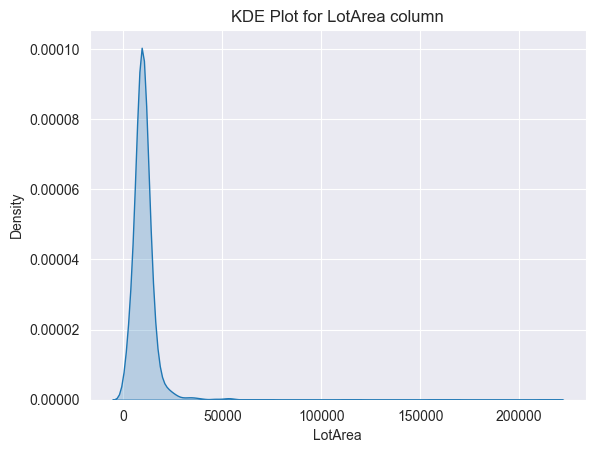

In [17]:
# KDE plot for column LotArea

sns.kdeplot(df['LotArea'], fill=True)

plt.xlabel("LotArea")
plt.ylabel("Density")
plt.title("KDE Plot for LotArea column")

plt.show()

In [18]:
df['LotArea'].min()

1300

In [19]:
df['LotArea'].max()

215245

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
scaled_df.head()

,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294


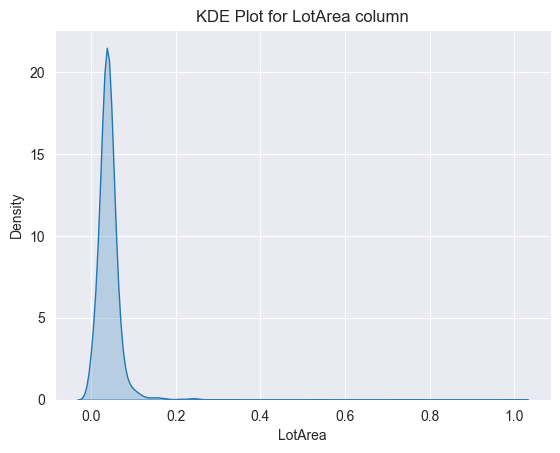

In [21]:
sns.kdeplot(scaled_df['LotArea'], fill=True)

plt.xlabel("LotArea")
plt.ylabel("Density")
plt.title("KDE Plot for LotArea column")

plt.show()

In [22]:
scaled_df['LotArea'].min()

0.0

In [23]:
scaled_df['LotArea'].max()

0.9999999999999999

StandardScaler standardizes features so that they are centered around 0 with a standard deviation of 1:

$$X_{\text{scaled}} = \frac{X - μ}{σ}$$

* Use StandardScaler when you assume your data follows a Gaussian distribution
or when the algorithm you are using assumes zero-centered data with unit variance.
* It is less sensitive to outliers when compared to MinMaxScaler.
* StandardScaler does not have a fixed specified range like MinMaxScaler. However, the actual range of transformed values depends on the distribution of the original data. In a normal (Gaussian) distribution, approximately:

1. 68% of the values will be between -1 and 1
2. 95% of the values will be between -2 and 2
3. 99.7% of the values will be between -3 and 3

* So, while StandardScaler does not enforce a strict range like MinMaxScaler, most values will typically fall within [-3, 3] in normally distributed data.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler2= StandardScaler()
scaled_data2 = scaler2.fit_transform(df)
scaled_df2 = pd.DataFrame(scaled_data2, columns=df.columns)

scaled_df2.head()

,LotArea,MSSubClass
0,-0.207142,0.073375
1,-0.091886,-0.872563
2,0.073480,0.073375
3,-0.096897,0.309859
4,0.375148,0.073375


In [25]:
scaled_df2['LotArea'].min()

-0.9237292282108067

In [26]:
scaled_df2['LotArea'].max()

20.51827315777325

In [27]:
# NORMALIZATION

# L1 NORM : sum of all absolute values in a feature is 1 (Manhattan norm)

# L2 NORM: sum of squared values equals 1 (Euclidean norm)

# when using KNN or SVM
# when you have many 0s
# not ideal when ML models expect normal distribution
# NLP, recommendation systems, document classification

In [28]:
from sklearn.preprocessing import normalize

df_norm_arr = normalize(df, norm='l1')
df_normalized = pd.DataFrame(df_norm_arr, columns=df.columns)

df_normalized.head()

,LotArea,MSSubClass
0,0.992949,0.007051
1,0.997921,0.002079
2,0.994695,0.005305
3,0.992723,0.007277
4,0.995810,0.004190


In [29]:
# FEATURE ENCODING

# categorical columns can be divided into 3 groups:

# 1. binary: '1'/'0' either/or: yes or no, hot or cold, alcoholic/non-alcoholic
# 2. ordinal: low, medium, high/ small, medium, large
# 3. nominal: cat, dog, pizza, soda

In [30]:
df = pd.read_csv('../data/EncodingData.csv')

df.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [31]:
df.dtypes

id        int64
bin_1    object
bin_2    object
nom_0    object
ord_2    object
dtype: object

Before conversion ['F' 'T']
After conversion: [0 1]


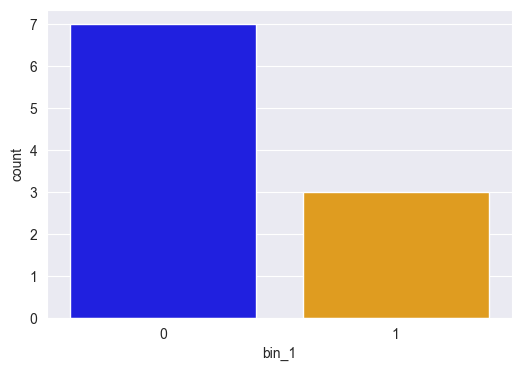

In [32]:
# Mapping binary features

print("Before conversion", df['bin_1'].unique())

# strip spaces and map values

df['bin_1'] = df['bin_1'].str.strip().map({'T': 1, 'F': 0})

# print values after conversion

print("After conversion:", df['bin_1'].unique())

# plot countplot

custom_palette = {"0":"blue", "1":"orange"}
plt.figure(figsize=(6,4))
sns.countplot(x='bin_1', data=df, palette=custom_palette)

plt.show()

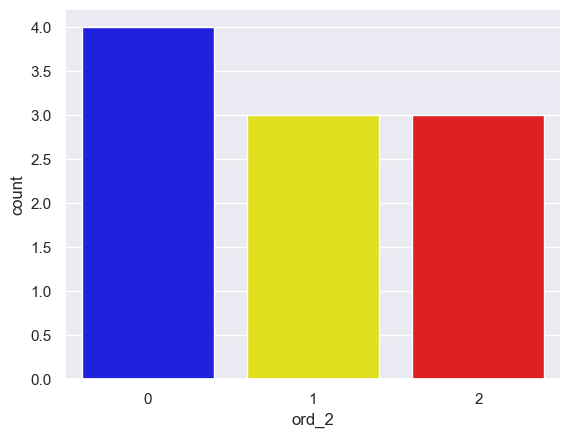

In [33]:
# label encoding

# assigning numerical values to categorical features
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
label_encoder = LabelEncoder()

df1 = df.copy()

df1['ord_2'] = label_encoder.fit_transform(df1['ord_2'])

custom_palette = {
    "0":"blue", 
    "1":"yellow",
    "2":"red",
}
sns.set_theme(style='darkgrid')
sns.countplot(x='ord_2', data=df1, palette=custom_palette)
plt.show()

In [34]:
df1.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,N,Red,1
1,1,0,Y,Blue,2
2,2,0,N,Blue,0
3,3,0,N,Green,2
4,4,1,N,Red,0
5,5,1,N,Green,1
6,6,0,N,Red,0
7,7,1,N,Red,0
8,8,0,N,Blue,2
9,9,0,Y,Red,1


In [35]:
# one-hot encoding

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

# fit and transform the data
one_hot_encoded_data = one_hot_encoder.fit_transform(df[['nom_0']]).toarray()

# create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data)

# concatenate the original DataFrame with the one-hot encoded DataFrame
df_one_hot_encoded = pd.concat([df1, one_hot_encoded_df], axis=1)
df_one_hot_encoded.drop(columns=['nom_0'], axis=1, inplace=True)

df_one_hot_encoded.head(10)

,id,bin_1,bin_2,ord_2,0,1,2
0,0,0,N,1,0.0,0.0,1.0
1,1,0,Y,2,1.0,0.0,0.0
2,2,0,N,0,1.0,0.0,0.0
3,3,0,N,2,0.0,1.0,0.0
4,4,1,N,0,0.0,0.0,1.0
5,5,1,N,1,0.0,1.0,0.0
6,6,0,N,0,0.0,0.0,1.0
7,7,1,N,0,0.0,0.0,1.0
8,8,0,N,2,1.0,0.0,0.0
9,9,0,Y,1,0.0,0.0,1.0


In [36]:
# frequency encoding

# frequency encoding is a technique used to convert categorical variables into numerical values based on the frequency of each category in the dataset.

# use this only when the frequency of the category is important, if not, it creates noise

df3 = df.copy()

frequency = df3.groupby(['nom_0']).size() / len(df3)

frequency.head(10)

nom_0
Blue     0.3
Green    0.2
Red      0.5
dtype: float64

In [37]:
df3.loc[:, '{}_freq_encoded'.format('nom_0')] = df3['nom_0'].map(frequency)
df3 = df3.drop(['nom_0'], axis=1)
frequency.plot.bar(stackee=True, color=plt.cm.)
plt.title('Frequency Encoding')
plt.show()

SyntaxError: invalid syntax (1573625864.py, line 3)

In [264]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

df4 = df.copy()

ordinal_encoder.fit(df4[['ord_2']])
df4['ord_2'] = ordinal_encoder.transform(df4[['ord_2']])

df4.head(10)

,id,bin_1,bin_2,nom_0,ord_2
0,0,0,N,Red,1.0
1,1,0,Y,Blue,2.0
2,2,0,N,Blue,0.0
3,3,0,N,Green,2.0
4,4,1,N,Red,0.0
5,5,1,N,Green,1.0
6,6,0,N,Red,0.0
7,7,1,N,Red,0.0
8,8,0,N,Blue,2.0
9,9,0,Y,Red,1.0


In [265]:
# impose an order by using manual mapping

df5 = df.copy()

temp_dict = {
    'Cold': 0,
    'Warm': 1,
    'Hot': 2
}

df5['ord_2_encoded'] = df5['ord_2'].map(temp_dict)
df5 = df5.drop(['ord_2'], axis=1)

df5.head(10)

,id,bin_1,bin_2,nom_0,ord_2_encoded
0,0,0,N,Red,2
1,1,0,Y,Blue,1
2,2,0,N,Blue,0
3,3,0,N,Green,1
4,4,1,N,Red,0
5,5,1,N,Green,2
6,6,0,N,Red,0
7,7,1,N,Red,0
8,8,0,N,Blue,1
9,9,0,Y,Red,2


In [ ]:
# column transformation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# numerical columns - fill missing values with SimpleImputer, scale with StandardScaler
# nominal columns - one-hot encode with OneHotEncoder
# ordinal columns - ordinal encode with OrdinalEncoder with a custom order (if needed)

# fetchopenml
from sklearn.datasets import fetch_openml